In [6]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns

plt.rcParams["figure.figsize"] = (20,10)

In [7]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
def spiParametersMle(x, dist=st.gamma):
    i = x == 0
    params = dist.fit(x[~i])
    q = len(x[i])/len(x)
    return(params, q)

def spiGeneratorMle(x, dist=st.gamma):
    i = x == 0

    params = dist.fit(x[~i])
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    G = dist.cdf(x[~i], loc=loc, scale=scale, *arg)

    q = len(x[i])/len(x)
    probabilities = np.zeros(len(x))
    probabilities[i] = q
    probabilities[~i] = q + (1 - q) * G
    result = st.norm.ppf(probabilities)
    return(result)

def spiGeneratorParamMle(x, params, q, dist=st.gamma):
    i = x == 0
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    G = dist.cdf(x[~i], loc=loc, scale=scale, *arg)

    probabilities = np.zeros(len(x))
    probabilities[i] = q
    probabilities[~i] = q + (1 - q) * G
    result = st.norm.ppf(probabilities)
    return(result)


In [9]:
def phase_averaging(data,freq = 12):
    N = len(data)
    temp = data
    result = np.zeros(N)
    averages = np.zeros(freq)
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        averages[j] = temp[Idx].mean()
        result[Idx] = (temp[Idx] - temp[Idx].mean())/temp[Idx].std()
    return(result, averages)

def deseasonalize_NoStd(data,freq=12):
    n  = data.shape[1]
    N  = data.shape[0]
    averages = np.zeros((freq,n))
    data_deseasonal = np.zeros(data.shape)
    for i in range(n):
        temp = data[:,i]
        result = np.zeros((N))
        for j in range(freq):
            Idx = np.arange(j,N,freq)
            averages[j,i] = temp[Idx].mean()
            result[Idx] = temp[Idx] - temp[Idx].mean()
        data_deseasonal[:,i] = result
    return(data_deseasonal,averages)


def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))


In [10]:
def deseasonalize(data,freq=12):
    """
    The shape of data should be (time, index) 
    """
    n  = data.shape[1]
    N  = data.shape[0]
    data_deseasonal = np.zeros(data.shape)
    for i in range(n):
        temp = np.copy(data[:,i])
        r = np.zeros((N))
        for j in range(freq):
            Idx = np.arange(j,N,freq)
            if temp[Idx].std() == 0:
                r[Idx] = 0
            else:
                r[Idx] = (temp[Idx] - temp[Idx].mean())/temp[Idx].std()
        data_deseasonal[:,i] = np.copy(r)
    return(data_deseasonal)


In [11]:
level = 12
temporal_limits = {"time_min":datetime(1977, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0) }
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

result = np.load("ET_data.npy")
result = pd.DataFrame(result)

rolling_n = 12
f = 12
n = 30

RFThree = result.rolling(rolling_n).apply(sum)
RFThree = RFThree.iloc[rolling_n - 1:,:]

N = RFThree.shape[0]

d3 = N - (n*f + 1)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if sys.path[0] == '':


In [8]:
level = 12
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2011, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

In [9]:
d = Data('../../nc/spi3_6_12_1deg_cru_ts_3_21_1949_2012pcs.nc','spi12',temporal_limits,missing_value=-9.969209968386869e+36)

IndexError: time_min or time_max is not in Index

In [51]:
f = Dataset('../../nc/spi3_6_12_1deg_cru_ts_3_21_1949_2012pcs.nc')

In [52]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    creation_date: Wed Dec  4 16:56:53 MST 2013
    reference: McKee, T.B., N.J. Doesken, and J. Kleist, 1993. The 
relationship of drought frequency and duration to time scales.
 8th Conference on Applied Climatology, Amer. Meteor. Soc., 
Jan 17-23, 1993, Anaheim CA, 179-186
    comment: The SPI was developed by Tom McKee, Nolan Doesken, and
 John Kliest in 1993.  Their Fortran routine was modified
 by Arlene Laing to work with 1-degree global gridded 
 precipitation data
    Conventions: CF
    institution: National Center for Atmospheric Research (NCAR)
    source: Land surface precipitation interpolated to 1x1 deg grid
 from the original Climate Research Unit Time Series, TS 3.21
    title: Standardized Precipitation Index (SPI) at 3, 6, and 12 months
    dimensions(sizes): time(768), lat(180), lon(360)
    variables(dimensions): float32 spi3(time,lat,lon), float64 time(time), float32 l

In [154]:
level = 12
temporal_limits = {"time_min":datetime(1946, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

In [21]:
d = Data('../../nc/GPCC_half.nc','precip',temporal_limits,missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [24]:
coordinates = list(zip(lat_list,lon_list))

In [25]:
dic = rg.search(coordinates)

Loading formatted geocoded file...


In [26]:
country = []
for i in range(len(dic)):
    country.append(dic[i].get('cc'))

In [27]:
ET_index = np.where(np.array(country)== "ET")[0]

In [11]:
ET_data = result[:-1,ET_index]

In [12]:
np.save("ET_data.npy",ET_data)

In [12]:
ET_data.shape

(467, 303)

In [13]:
len(ET_index)

303

# SPI World

In [42]:
level = 12
temporal_limits = {"time_min":datetime(1946, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) }
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

n_components_spi = 46

d = Data('../../nc/precip.mon.total.2.5x2.5.v2018.nc','precip',temporal_limits,missing_value=-9.96921e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

result = np.load("World_gamma.npy")
weights = np.sqrt(np.abs(np.cos(np.array(lat_list)* math.pi/180)))
for i in range(len(weights)):
    result[:,i] = weights[i] * result[:,i]

In [43]:
data_spi = pd.DataFrame(result)


#scale = StandardScaler()
#scaled_data = scale.fit_transform(data_spi)

pca = PCA(n_components=n_components_spi)
pca_model = pca.fit(data_spi)
df_cluster_spi = pca_model.transform(data_spi)


#Matrix = pd.DataFrame(np.transpose(pca_model.components_))
#Matrix = (Matrix - Matrix.mean())/Matrix.std()
loading_spi = pf.varimax(np.transpose(pca_model.components_), q=1000)
#loading_spi = np.transpose(pca_model.components_)
for z in range(loading_spi.shape[1]):
    loading_spi[:,z] = loading_spi[:,z] / np.linalg.norm(loading_spi[:,z])
loading_spi = pd.DataFrame(loading_spi)

In [44]:
clusters = loading_spi.idxmax(axis=1)
df_spi = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

lon_temp = df_spi["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_spi["lons"].vlues = lon_temp

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


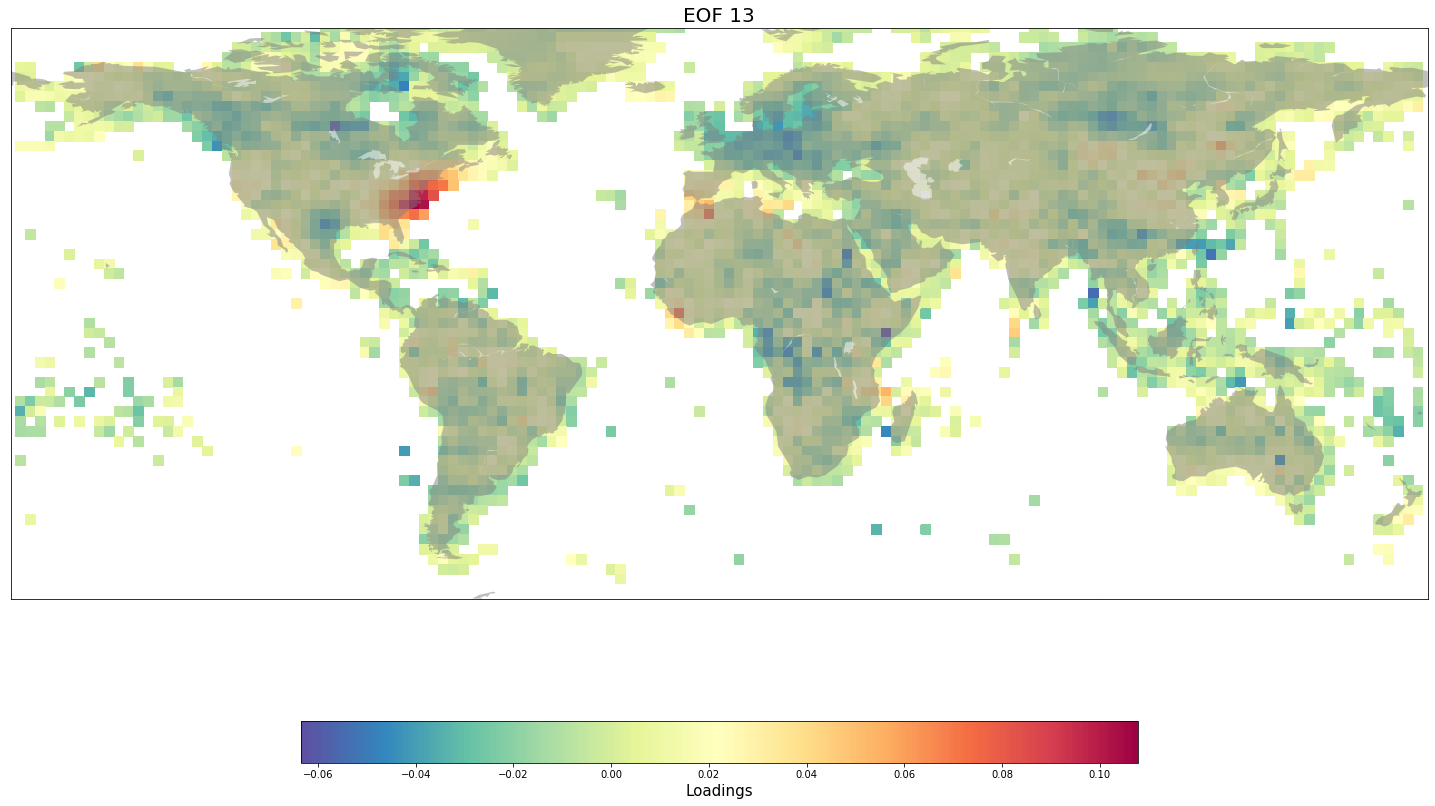

In [49]:
pc = 13
df_spi["pc"] = loading_spi[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-178.75,180,2.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


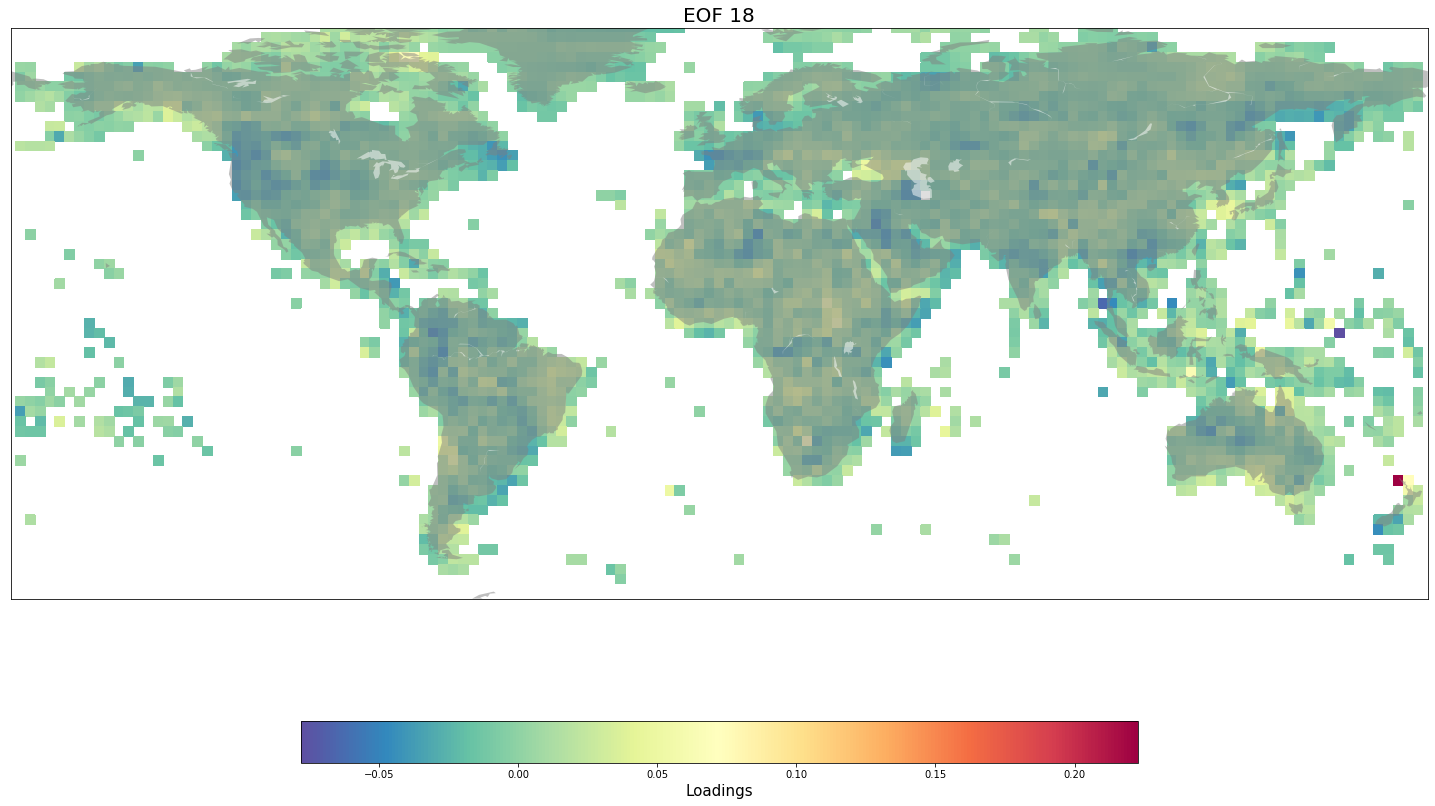

In [48]:
pc = 18
df_spi["pc"] = loading_spi[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-178.75,180,2.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


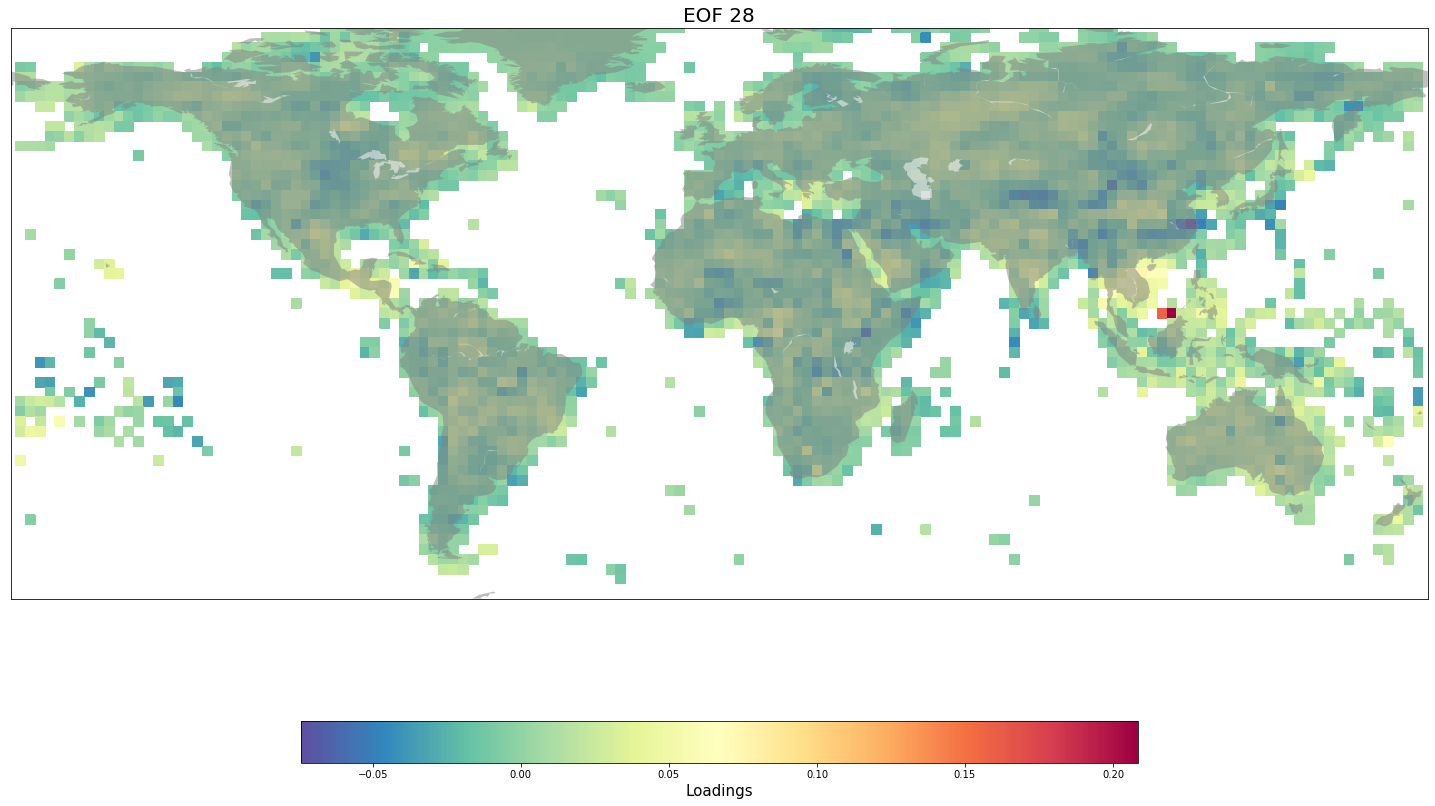

In [50]:
pc = 28
df_spi["pc"] = loading_spi[pc]

#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-178.75,180,2.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat[i]) & (df_spi.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1, lat)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

# SPI

In [12]:
ET_data = np.load("ET_data.npy")

In [13]:
ET_gamma = np.load("ET_gamma.npy")

In [14]:
index = np.isinf(ET_gamma)
ET_gamma[index]= 2.3263478740408408

In [15]:
ET_gamma.shape

(468, 303)

In [16]:
data = np.transpose(ET_gamma)

In [17]:
eigenValues, eigenVectors = np.linalg.eig(np.corrcoef(data))
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]

np.count_nonzero(eigenValues > (1+math.sqrt(data.shape[0]/data.shape[1]))**2)

18

In [18]:
data.shape

(303, 468)

In [19]:
n_components_spi = 18

data_spi = pd.DataFrame(np.transpose(data))


#scale = StandardScaler()
#scaled_data = scale.fit_transform(data_spi)

pca = PCA(n_components=n_components_spi)
pca_model = pca.fit(data_spi)
df_cluster_spi = pca_model.transform(data_spi)


#Matrix = pd.DataFrame(np.transpose(pca_model.components_))
#Matrix = (Matrix - Matrix.mean())/Matrix.std()
loading_spi = pf.varimax(np.transpose(pca_model.components_), q=1000)
for z in range(loading_spi.shape[1]):
    loading_spi[:,z] = loading_spi[:,z] / np.linalg.norm(loading_spi[:,z])
loading_spi = pd.DataFrame(loading_spi)

In [22]:
lon_list = np.array(lon_list)
lat_list = np.array(lat_list)

In [28]:
lon_spi_list = lon_list[ET_index]

In [29]:
lat_spi_list = lat_list[ET_index]

In [30]:
clusters = loading_spi.idxmax(axis=1)
df_spi = pd.DataFrame({"lons":lon_spi_list,"lats":lat_spi_list,"clusters":clusters.values.tolist()})

lon_temp = df_spi["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_spi["lons"].vlues = lon_temp

In [31]:
lat_spi  = np.array(list(set(lat_spi_list)))
lat_spi = np.sort(lat_spi)
lon_spi  = np.array(list(set(lon_spi_list)))
lon_spi = np.sort(lon_spi)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


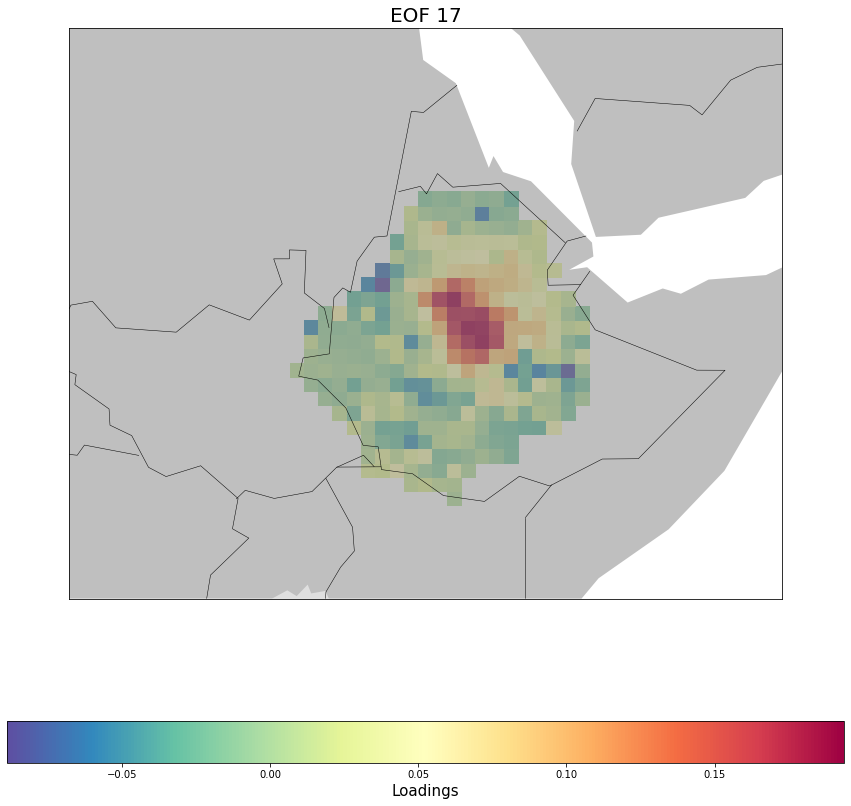

In [34]:
pc = 17
df_spi["pc"] = loading_spi[pc]


#lon = np.arange(-178.75,179.0,2.5)
#lon_spi = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_spi),len(lon_spi)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon[0], llcrnrlat=lat[-1],urcrnrlon=lon[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=25, llcrnrlat=0,urcrnrlon=50,urcrnrlat=20)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
map.drawcountries()
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon_spi, lat_spi)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


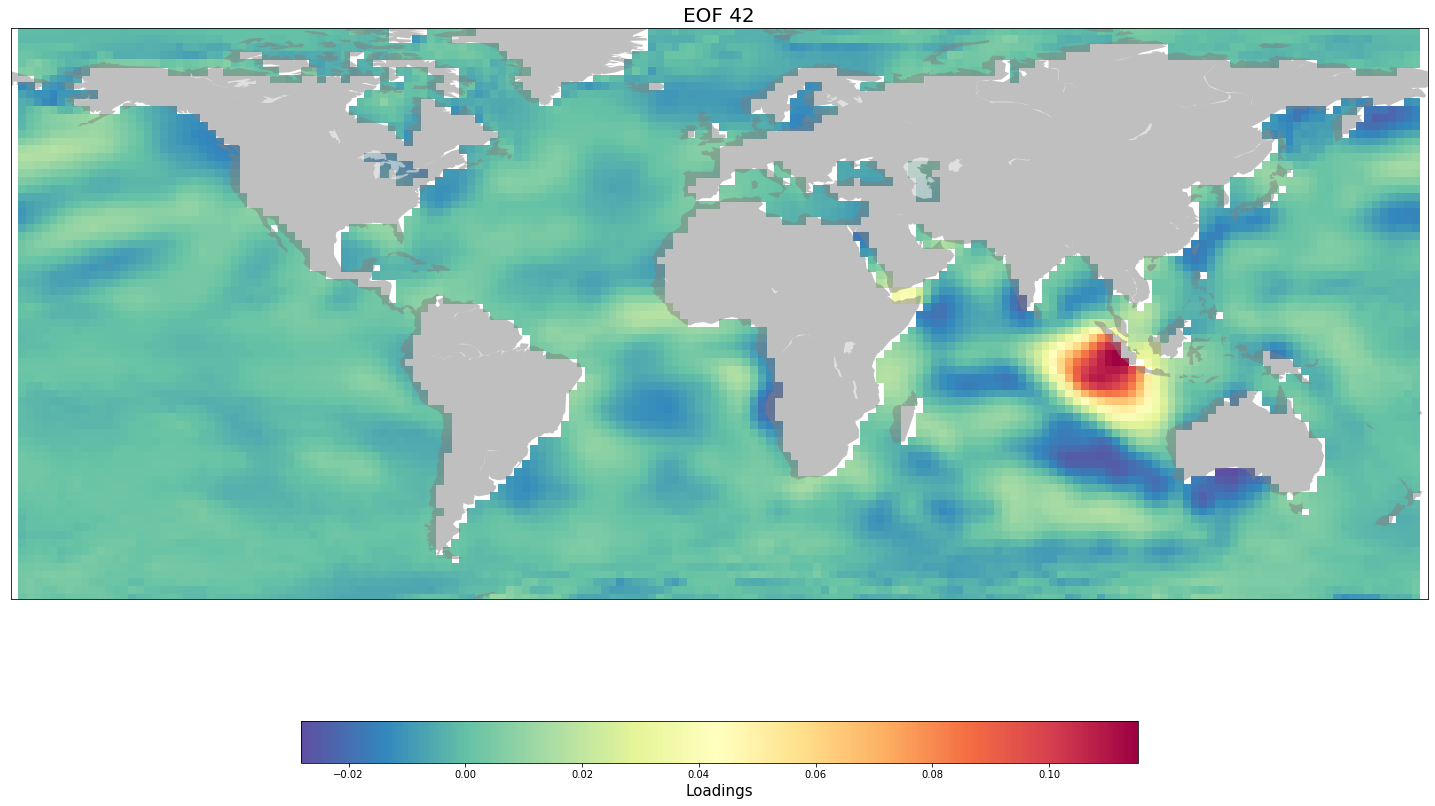

In [46]:
pc = 42
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


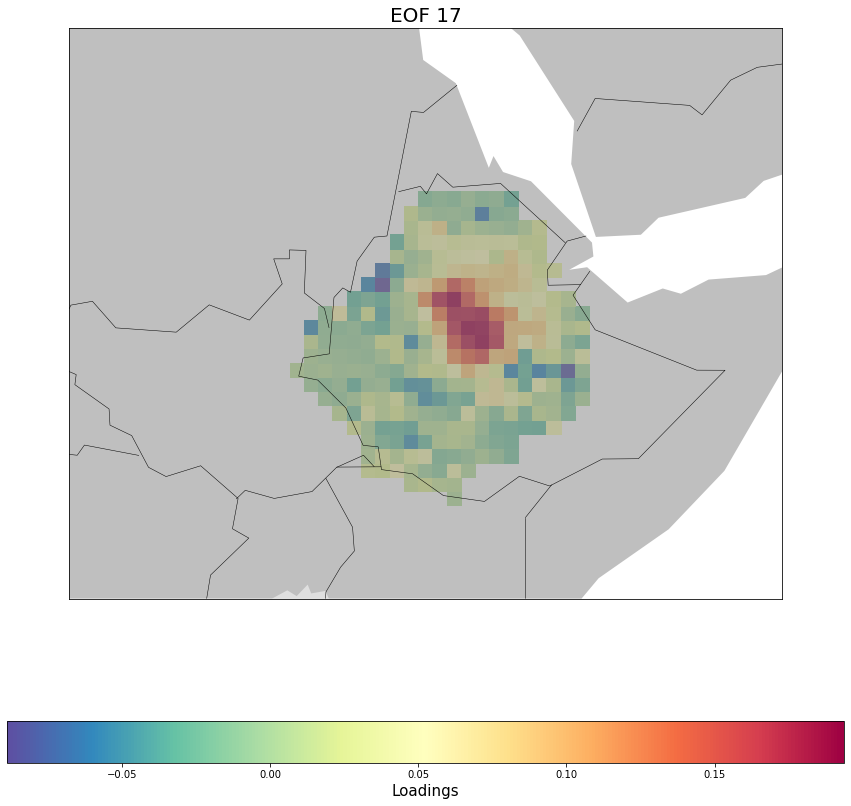

In [42]:
pc = 17
df_spi["pc"] = loading_spi[pc]


#lon = np.arange(-178.75,179.0,2.5)
#lon_spi = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_spi),len(lon_spi)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon[0], llcrnrlat=lat[-1],urcrnrlon=lon[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=25, llcrnrlat=0,urcrnrlon=50,urcrnrlat=20)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
map.drawcountries()
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon_spi, lat_spi)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


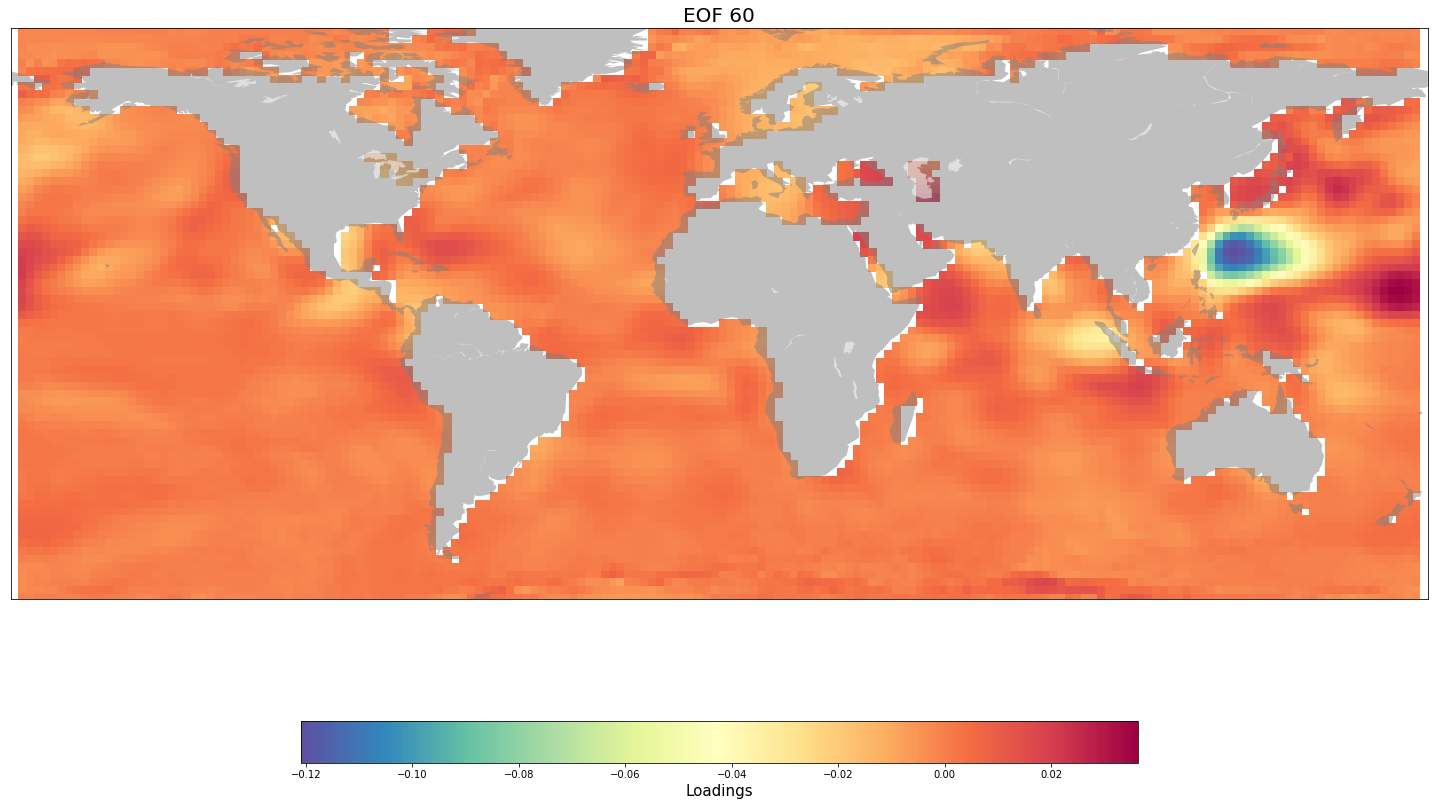

In [47]:
pc = 60
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

In [199]:
np.save("df_cluster_spi.npy",df_cluster_spi)

In [207]:
result_spi = np.array(df_cluster_spi)
#result_extremes = result_extremes.reshape((len(count),1))
#result_precip = np.array(df_cluster[0])
#result_pres = np.array(df_cluster[1])
#result_sat = np.array(df_cluster[2])
result_sst = np.array(df_cluster_sst)


result = np.concatenate((result_spi,result_sst), axis=1)
result = np.array(result)

In [37]:
ET_gamma = np.load("ET_gamma.npy")
N = ET_gamma.shape[0]
n_nodes = ET_gamma.shape[1]
extremes_treshold = -1
count = []
for i in range(N):
    count.append(np.count_nonzero(ET_gamma[i,:] <= extremes_treshold))

In [44]:
n_components_sst = 76


sst = Data('../../nc/sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()

result_sst = pf.deseasonalize(np.array(result_sst))
weights = np.sqrt(np.abs(np.cos(np.array(lat_sst_list)* math.pi/180)))
for i in range(len(weights)):
    result_sst[:,i] = weights[i] * result_sst[:,i]

data_sst = pd.DataFrame(result_sst)


#scale = StandardScaler()
#scaled_data = scale.fit_transform(data_sst)

pca = PCA(n_components=n_components_sst)
pca_model = pca.fit(data_sst)
df_cluster_sst = pca_model.transform(data_sst)


#Matrix = pd.DataFrame(np.transpose(pca_model.components_))
#Matrix = (Matrix - Matrix.mean())/Matrix.std()
loading_sst = pf.varimax(np.transpose(pca_model.components_), q=1000)
for z in range(loading_sst.shape[1]):
    loading_sst[:,z] = loading_sst[:,z] / np.linalg.norm(loading_sst[:,z])
loading_sst = pd.DataFrame(loading_sst)

#Matrix = np.transpose(pca_model.components_)
#loading_sst = pd.DataFrame(pf.varimax(Matrix, q=1000))


clusters = loading_sst.idxmax(axis=1)
df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clusters.values.tolist()})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


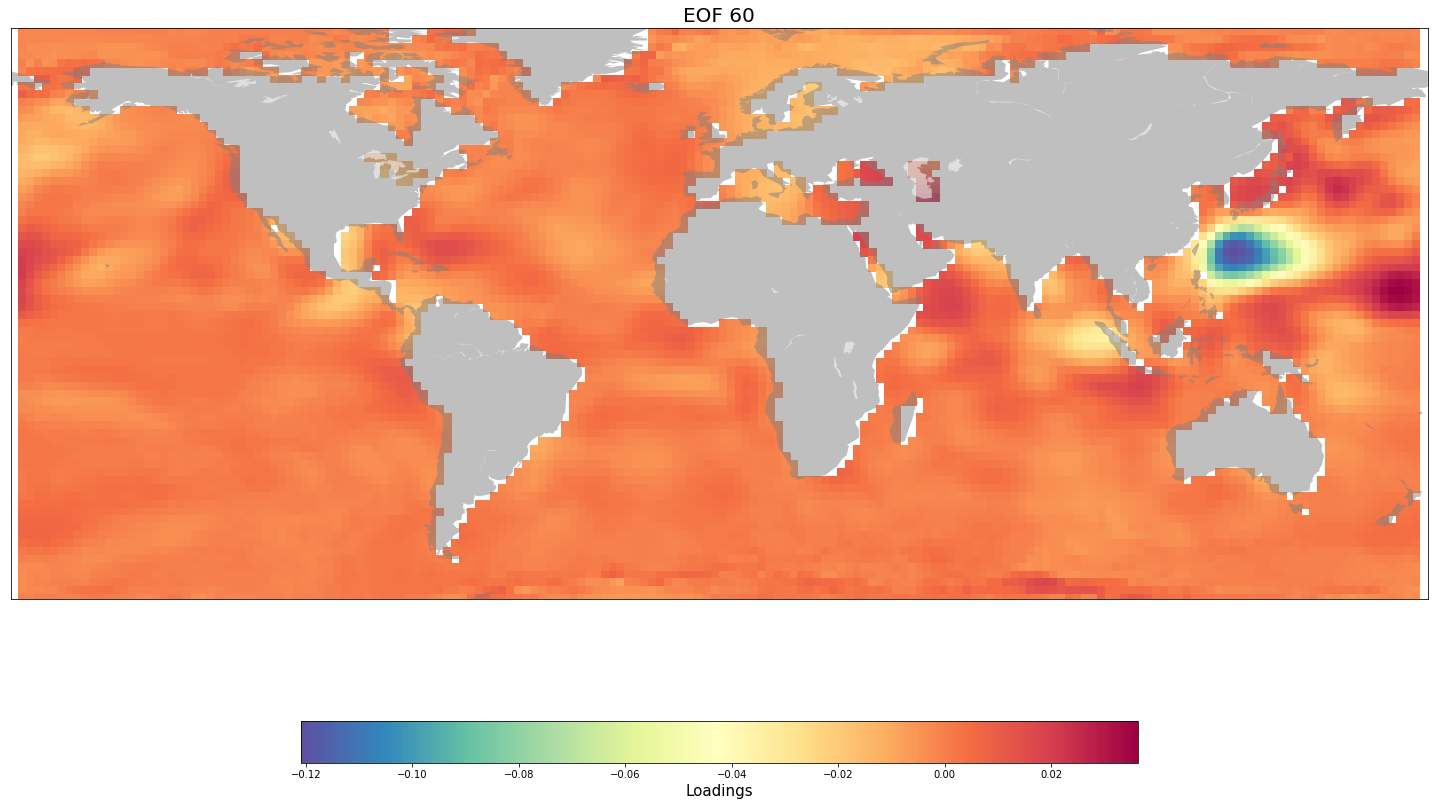

In [45]:
pc = 42
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


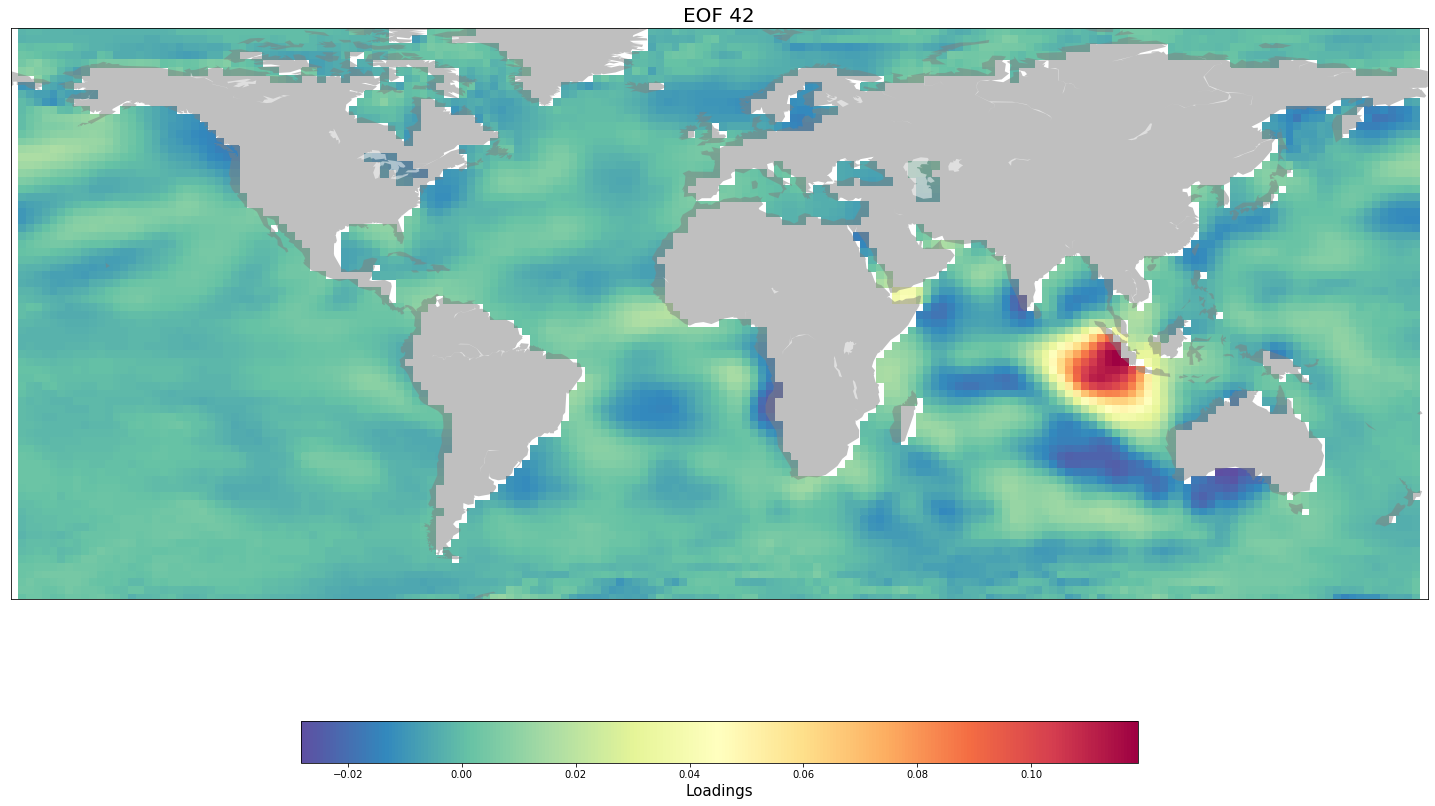

In [210]:
pc = 60
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


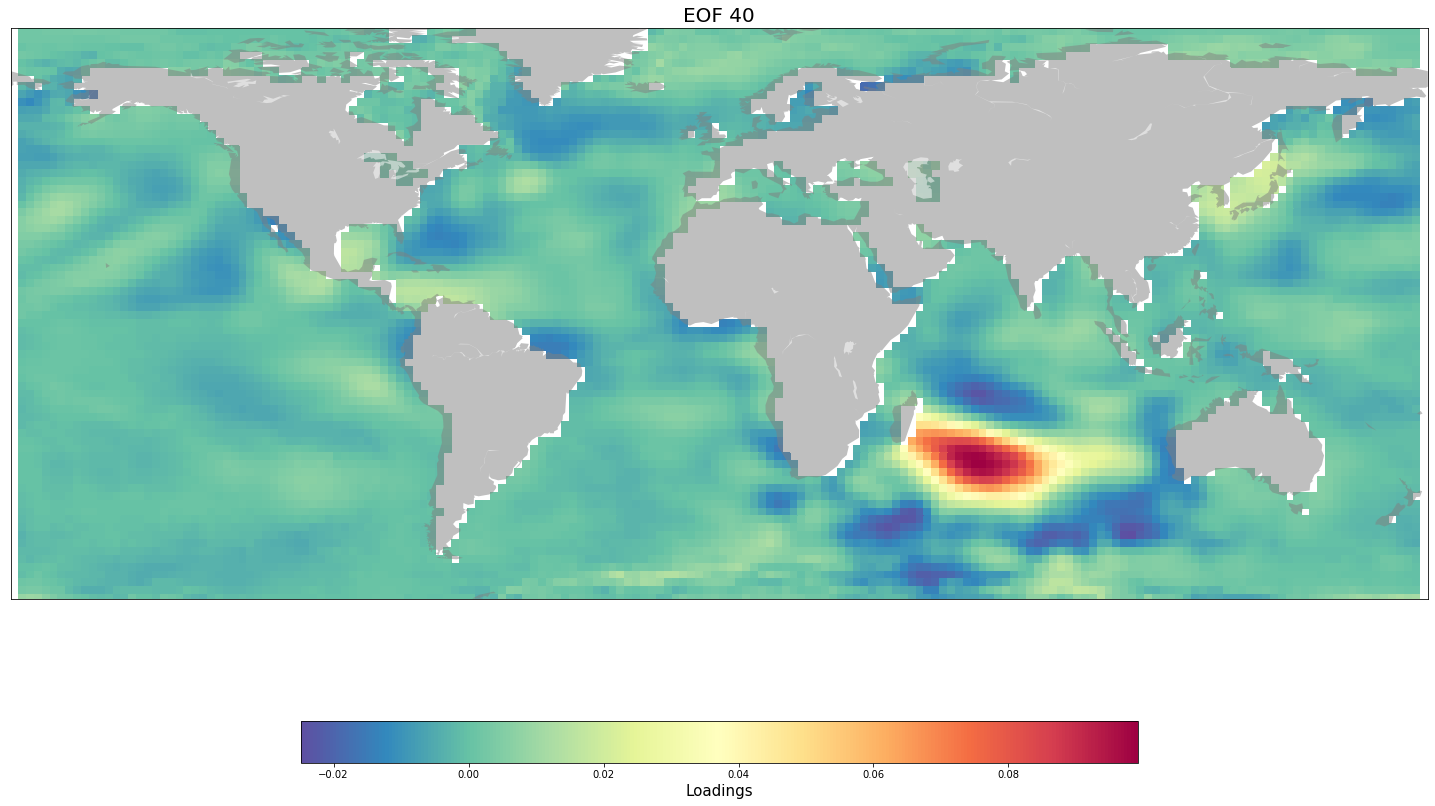

In [30]:
pc = 40
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


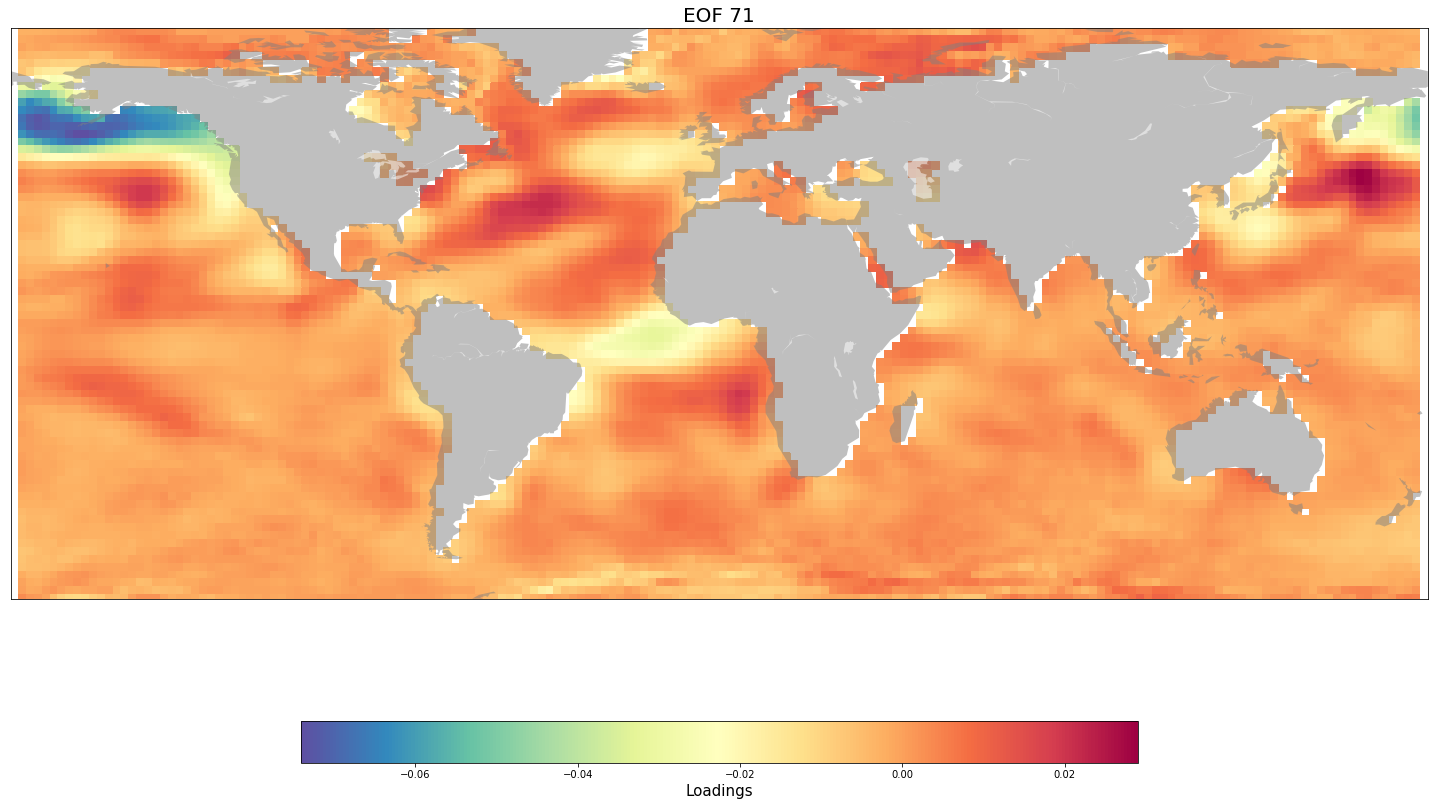

In [31]:
pc = 71
df_sst["pc"] = loading_sst[pc]


#lon1 = np.arange(-178.75,179.0,2.5)
lon1_sst = np.arange(-180,180,2)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_sst),len(lon1_sst)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].clusters.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
        else:
            deg[i,j]=np.nan


plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon1_sst, lat_sst)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

# SPI for Clusters

In [12]:
spi = np.load("../results/SPI12Index.npy")
spi = spi[1:,:]

In [13]:
level = 12
temporal_limits = {"time_min":datetime(1946, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

In [15]:
d = Data('../precipitation.nc','precip',temporal_limits,missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

#result = pd.DataFrame(result)
result = pf.deseasonalize(np.array(result))
weights = np.sqrt(np.abs(np.cos(np.array(lat_list)* math.pi/180)))
for i in range(len(weights)):
    result[:,i] = weights[i] * result[:,i]

result = pd.DataFrame(result)

#result = np.array(result)

temp = np.array(result)
clustering = AgglomerativeClustering(n_clusters=16).fit(np.transpose(temp))

df = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clustering.labels_})

lon_temp = df["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df["lons"] = lon_temp

clusters = clustering.labels_



/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


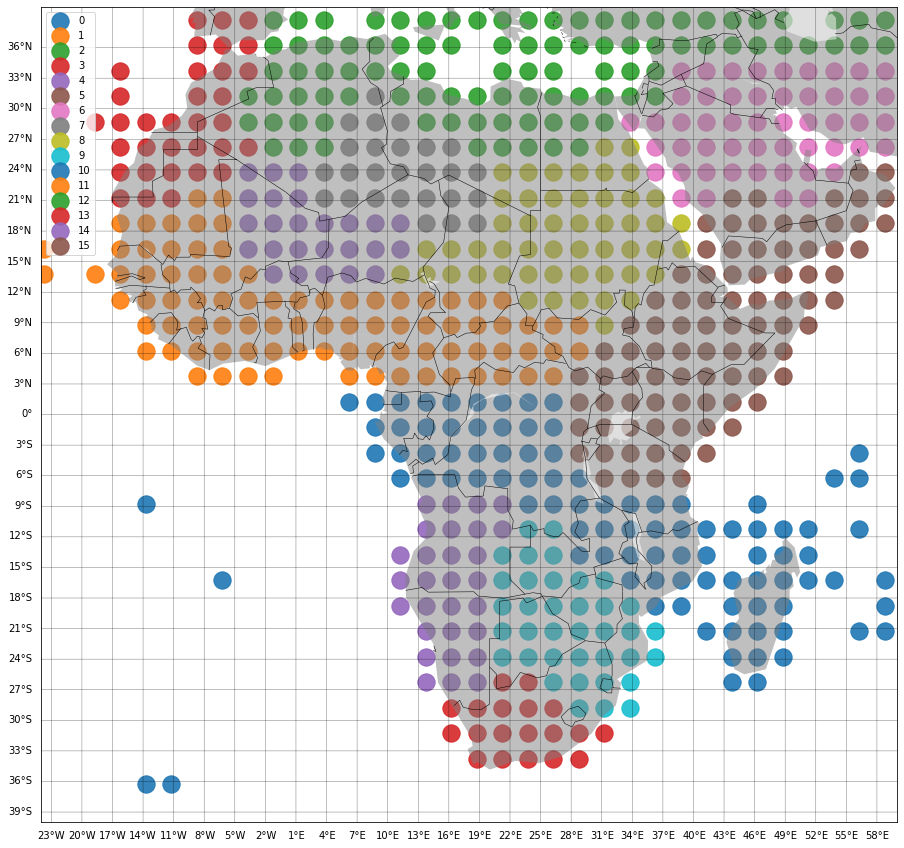

In [16]:
df_list = []
for j in range(len(set(clusters))):
    df_list.append(pd.DataFrame(columns=df.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
m.drawcountries()
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(clusters):
    values = df["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=300, label = i)
    i+=1

#plt.savefig("../plots/clusters.png")  
plt.legend()
plt.show()

In [77]:
cluster_id = 5

In [78]:
Idx = np.where((df.clusters == cluster_id).values)[0]

In [79]:
temp = spi[:,Idx]
N = temp.shape[0]
n_nodes = temp.shape[1]
count = []
for i in range(N):
    count.append(np.count_nonzero(temp[i,:]))

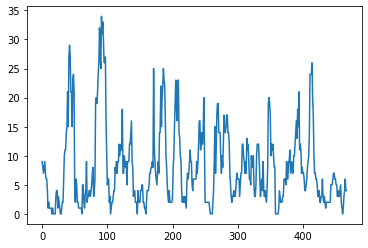

In [80]:
plt.plot(count)

In [81]:
np.save("count_5.npy",np.array(count))

In [82]:
a = np.load("../spiCount/count_5.npy")

In [88]:
np.array(a).shape

(468,)

In [160]:
level = 12
temporal_limits = {"time_min":datetime(1949, 1, 1, 0, 0),"time_max":datetime(2011, 12, 1, 0, 0) }
spatial_limits = {"lon_min":-40,"lon_max":60,"lat_min":-40,"lat_max":40}

In [172]:
f = Dataset('../../nc/spi3_6_12_1deg_cru_ts_3_21_1949_2012pcs.nc')

In [173]:
f.variables.keys()

odict_keys(['spi3', 'time', 'lat', 'lon', 'spi6', 'spi12', 'date'])

In [174]:
lat, lon, time, spi = f.variables['lat'], f.variables['lon'], f.variables['time'], f.variables['spi12']

In [188]:
f.variables['date'][-1]

201212

In [176]:
lat = lat[:]
lon = lon[:]
time = time[:]

In [128]:
np.where(lat == -40.5)

(array([49]),)

In [129]:
np.where(lat == 40.5)

(array([130]),)

In [130]:
lat = lat[49:131]

In [131]:
np.where(lon == -39.5)

(array([140]),)

In [132]:
np.where(lon == 59.5)

(array([239]),)

In [133]:
lon = lon[140:240]

In [177]:
spi = np.swapaxes(spi,0,2)

In [135]:
spi = spi[140:240,49:131,12:]

In [178]:
spi = spi[:,:,12:]
result = []
lat_list = []
lon_list = []
for i in range(len(lon)):
    for j in range(len(lat)):
        if not spi[i,j,-1] > 1000:
            result.append(spi[i,j,:])
            lon_list.append(lon[i])
            lat_list.append(lat[j])

In [123]:
result = np.transpose(result)

In [111]:
np.save("spi12_global.npy",result)

In [107]:
weights = np.sqrt(np.abs(np.cos(np.array(lat_list)* math.pi/180)))

In [108]:
for i in range(len(weights)):
    result[i,:] = weights[i] * result[i,:]

In [145]:
np.where(np.isnan(c))

(array([    0,     0,     0, ..., 17192, 17192, 17192]),
 array([    0,     1,     2, ..., 17190, 17191, 17192]))

In [146]:
c[0,0]

nan

In [149]:
len(data[0,:])

756

In [104]:
result = np.array(result)

In [112]:
result.shape

(17193, 756)

In [140]:
c = np.corrcoef(data)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [141]:
c.shape

(17193, 17193)

In [151]:
c = np.nan_to_num(c)

In [152]:
np.count_nonzero(np.isnan(c))

0

In [179]:
result = np.array(result)

In [181]:
coordinates = list(zip(lat_list,lon_list))

dic = rg.search(coordinates)

country = []
for i in range(len(dic)):
    country.append(dic[i].get('cc'))

In [182]:
result = np.transpose(result)

In [183]:
ET_index = np.where(np.array(country)== "ET")[0]
ET_data = result[:,ET_index]

In [184]:
ET_data.shape

(756, 74)

In [141]:
np.save("spi_ET.npy",ET_data)

In [185]:
N = ET_data.shape[0]
n_nodes = ET_data.shape[1]
extremes_treshold = -1
count = []
for i in range(N):
    count.append(np.count_nonzero(ET_data[i,:] <= extremes_treshold))

In [186]:
np.save("count_spi.npy",np.array(count))

In [ ]:
data = np.transpose(result)

eigenValues, eigenVectors = np.linalg.eig(np.corrcoef(data))
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]

np.count_nonzero(eigenValues > (1+math.sqrt(data.shape[0]/data.shape[1]))**2)

In [124]:
data = result

In [125]:
n_components_spi = 9

data_spi = pd.DataFrame(np.transpose(data))


#scale = StandardScaler()
#scaled_data = scale.fit_transform(data_spi)

pca = PCA(n_components=n_components_spi)
pca_model = pca.fit(data_spi)
df_cluster_spi = pca_model.transform(data_spi)


#Matrix = pd.DataFrame(np.transpose(pca_model.components_))
#Matrix = (Matrix - Matrix.mean())/Matrix.std()
loading_spi = pf.varimax(np.transpose(pca_model.components_), q=1000)
for z in range(loading_spi.shape[1]):
    loading_spi[:,z] = loading_spi[:,z] / np.linalg.norm(loading_spi[:,z])
loading_spi = pd.DataFrame(loading_spi)

In [75]:
#For ET only
lon_list = np.array(lon_list)
lat_list = np.array(lat_list)

lon_spi_list = lon_list[ET_index]
lat_spi_list = lat_list[ET_index]

In [126]:
clusters = loading_spi.idxmax(axis=1)
df_spi = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":clusters.values.tolist()})

lon_temp = df_spi["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_spi["lons"].vlues = lon_temp

In [77]:
#For ET only
lat_spi  = np.array(list(set(lat_spi_list)))
lat_spi = np.sort(lat_spi)
lon_spi  = np.array(list(set(lon_spi_list)))
lon_spi = np.sort(lon_spi)

In [78]:
np.save("df_cluster_SPI.npy",df_cluster_spi)

In [127]:
lon_spi = lon
lat_spi = lat

In [131]:
pc = 1
df_spi["pc"] = loading_spi[pc]

In [132]:
#lon1 = np.arange(-178.75,179.0,2.5)
#lon1_spi = lon_spi
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat_spi),len(lon_spi)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].clusters.values.size == 0:
            deg[i,j] = df_spi[(df_spi.lats == lat_spi[i]) & (df_spi.lons == lon_spi[j])].pc.values
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


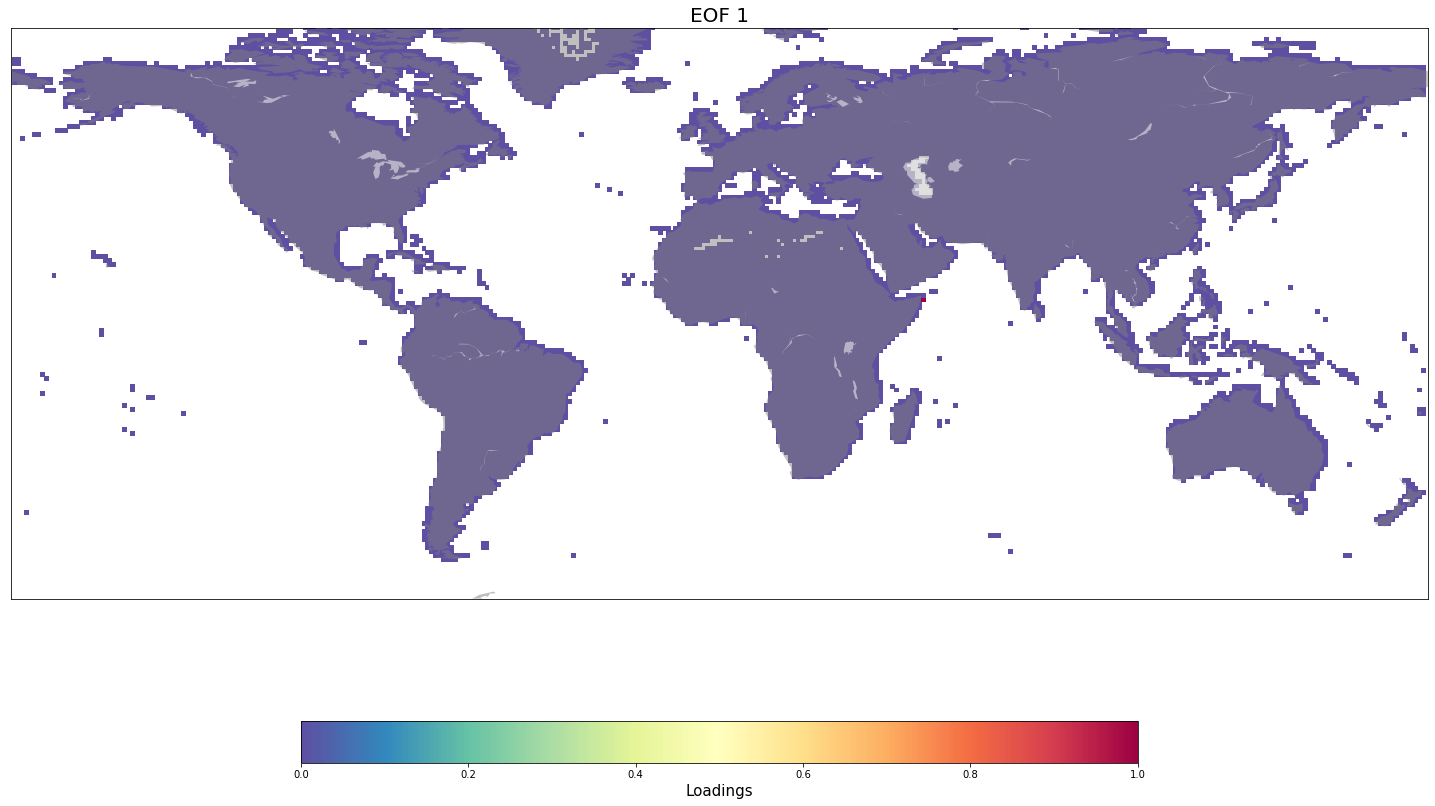

In [133]:
plt.figure(figsize=(30,15))
# Make the background map
#map=Basemap(llcrnrlon=lon1[0], llcrnrlat=lat[-1],urcrnrlon=lon1[-1],urcrnrlat=lat[0])
map =Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.5)
#m.drawcoastlines(linewidth=0.1, color="white")
#map.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
#map.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
map.drawcoastlines(linewidth=0.)


xx, yy = meshgrid(lon_spi, lat_spi)
cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
#plt.clim(-0.1,0.1)
cbar.set_label('Loadings', fontsize = 15)
plt.title("EOF %d"%(pc),fontsize = 20)
#plt.savefig("EOF%d.png"%(pc+1))
plt.show()

In [134]:
result

array([[-1.1367486 , -1.1367486 , -1.1367486 , ..., -1.1367486 ,
        -1.1367486 , -1.1367486 ],
       [-0.30796131, -0.2712447 , -0.2511902 , ..., -0.03966669,
        -0.2574457 , -0.21339096],
       [-0.20566463, -0.19215183, -0.1886761 , ...,  0.11700863,
        -0.12911691, -0.16334167],
       ...,
       [ 0.31816864,  0.32056648,  0.3317418 , ..., -1.5261102 ,
        -1.668405  , -1.3640288 ],
       [-0.82303965, -0.82303965, -0.82303965, ..., -0.82303965,
        -0.82303965, -0.82303965],
       [-0.84032446, -0.84032446, -0.84032446, ..., -0.84032446,
        -0.84032446, -0.84032446]], dtype=float32)

In [ ]:








time[0]

latvals[:]

lonvals[:]

latvals[53]

lonvals[25]

air[500,0,80]

lonvals[:]

data = pr_wtr[:,:,:]

data = np.concatenate((tmin[:,258:,:], tmin[:,:101,:]), axis=1)

data = np.concatenate((data[:,:,132:], data[:,:,:25]), axis=2)

data = np.flip(data, 1)

data.shape

In [134]:
n_components_sst = 15

sst = Data('../../nc/sst.mnmean.nc','sst',temporal_limits, missing_value= -9.96921e+36)

result_sst = sst.get_data()
lon_sst_list = sst.get_lon_list()
lat_sst_list = sst.get_lat_list()
lon_sst = sst.get_lon()
lat_sst = sst.get_lat()


result_sst = pf.deseasonalize(np.array(result_sst))

#temp = pf.deseasonalize(np.transpose(result))
temp = np.array(result_sst)
#temp = pf.deseasonalize(result)
clustering = AgglomerativeClustering(n_clusters=n_components_sst).fit(np.transpose(temp))

df_sst = pd.DataFrame({"lons":lon_sst_list,"lats":lat_sst_list,"clusters":clustering.labels_})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

cluster_sst = []
for i in range(n_components_sst):
    Idx = np.where((df_sst.clusters == i).values)[0]
    r = result_sst[:,Idx]
    #r = pf.deseasonalize(np.array(r))
    data = pd.DataFrame(r)
    cluster_sst.append(pd.DataFrame(result_sst).mean(1))
    #scale = StandardScaler()
    #scaled_data = scale.fit_transform(data)
    #pca = PCA(n_components=n_components_sst)
    #pca_model = pca.fit(scaled_data)
    #pca_data = pca_model.transform(data)
    #cluster_sst.append(pca_data[:,0])

df_cluster_sst = pd.DataFrame(np.transpose(np.matrix(cluster_sst)))

scale = StandardScaler()
df_cluster_sst = scale.fit_transform(df_cluster_sst)

count_name  = ["count"]

sst_name  = []
for i in range(n_components_sst):
    sst_name.append("SST_%d"%i)

#
var_names = count_name + sst_name

result_d = np.array(count)
result_d = result_d.reshape((len(count),1))
result_sst = np.matrix(df_cluster_sst)

result = np.concatenate((result_d, result_sst,), axis=1)
result = np.matrix(result)

dataframe = pp.DataFrame(result,var_names=var_names)
cond_ind_test = ParCorr()
pcmci = PCMCI(dataframe=dataframe, cond_ind_test=cond_ind_test)

In [135]:
results = pcmci.run_pcmci(tau_max=12, pc_alpha=None)

pcmci.print_significant_links(p_matrix=results['p_matrix'],
                                     val_matrix=results['val_matrix'],
                                     alpha_level=0.01)

/home/mathsys2/.local/lib/python3.6/site-packages/tigramite-4.0.0b0-py3.6-linux-x86_64.egg/tigramite/independence_tests.py:1112: RuntimeWarning: divide by zero encountered in double_scalars
  trafo_val = value * np.sqrt(deg_f/(1. - value*value))



## Significant links at alpha = 0.01:

    Variable count has 2 link(s):
        (count -1): pval = 0.00000 | val = 0.698
        (count -12): pval = 0.00000 | val = -0.270

    Variable SST_0 has 194 link(s):
        (SST_1 0): pval = 0.00000 | val = 1.000
        (SST_2 0): pval = 0.00000 | val = 1.000
        (SST_3 0): pval = 0.00000 | val = 1.000
        (SST_4 0): pval = 0.00000 | val = 1.000
        (SST_5 0): pval = 0.00000 | val = 1.000
        (SST_6 0): pval = 0.00000 | val = 1.000
        (SST_7 0): pval = 0.00000 | val = 1.000
        (SST_8 0): pval = 0.00000 | val = 1.000
        (SST_9 0): pval = 0.00000 | val = 1.000
        (SST_10 0): pval = 0.00000 | val = 1.000
        (SST_11 0): pval = 0.00000 | val = 1.000
        (SST_12 0): pval = 0.00000 | val = 1.000
        (SST_13 0): pval = 0.00000 | val = 1.000
        (SST_14 0): pval = 0.00000 | val = 1.000
        (SST_0 -1): pval = 0.00000 | val = 0.954
        (SST_1 -1): pval = 0.00000 | val = 0.954
        (SST_2

In [136]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable count has 2 link(s):
        (count -1): pval = 0.00000 | qval = 0.00000 | val = 0.698
        (count -12): pval = 0.00000 | qval = 0.00000 | val = -0.270

    Variable SST_0 has 194 link(s):
        (SST_1 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_2 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_3 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_4 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_5 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_6 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_7 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_8 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_9 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_10 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_11 0): pval = 0.00000 | qval = 0.00000 | val = 1.000
        (SST_12 0): pval = 0.00000 | q

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


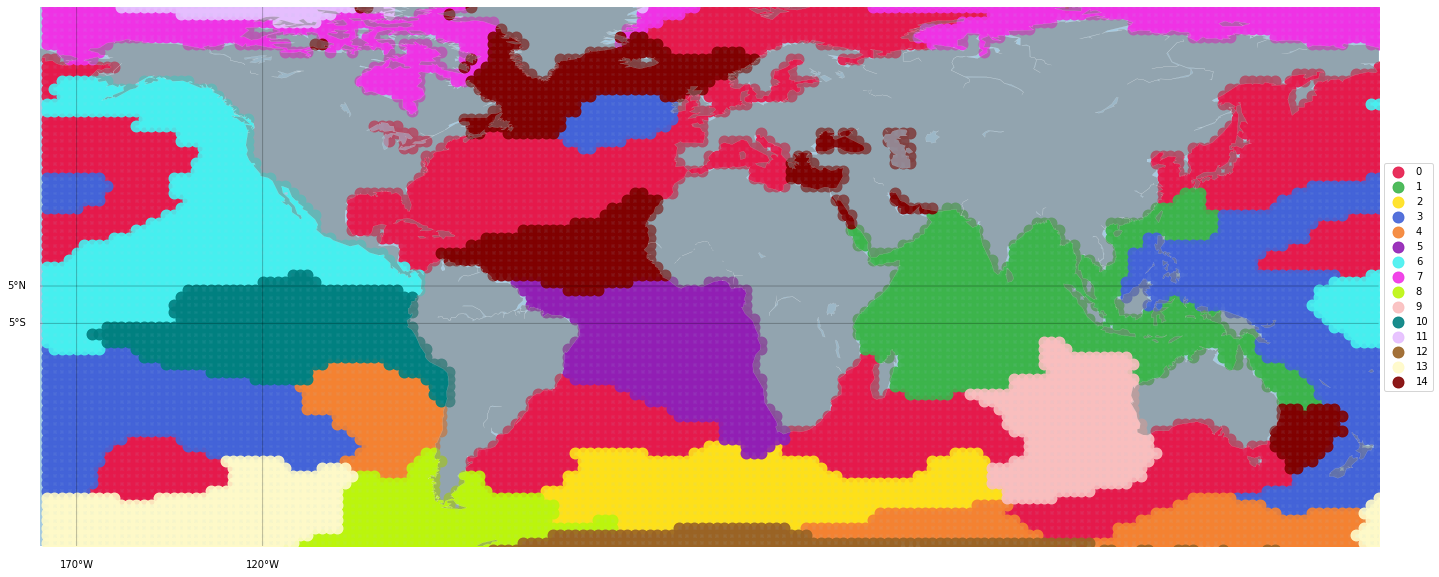

In [118]:
df_list = []
for j in range(n_components_sst):
    df_list.append(pd.DataFrame(columns=df_sst.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawparallels(np.arange(int(-5),int(10),10),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-170),int(-80),50),labels=[0,0,0,1],linewidth=0.5)

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
'#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

#colors = ['#fff7fb', '#ece7f2', '#d0d1e6', '#a6bddb', '#74a9cf', 
#'#3690c0', '#0570b0', '#045a8d', '#023858', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
#'#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

#colors = color_map(np.arange(0,n_components_sst,1),cm.RdYlBu)
#'#{:02x}{:02x}{:02x}{:02x}'.format( 120, 0 , 255, 128 )

#colors = pf.random_color(n_components_sst)

for i in range(n_components_sst):
    values = df_sst["clusters"].values  
    Idx = np.where(values == i)[0]
    df_list[i] = df_sst.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=120, label = i, c = colors[i])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
#plt.legend()
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


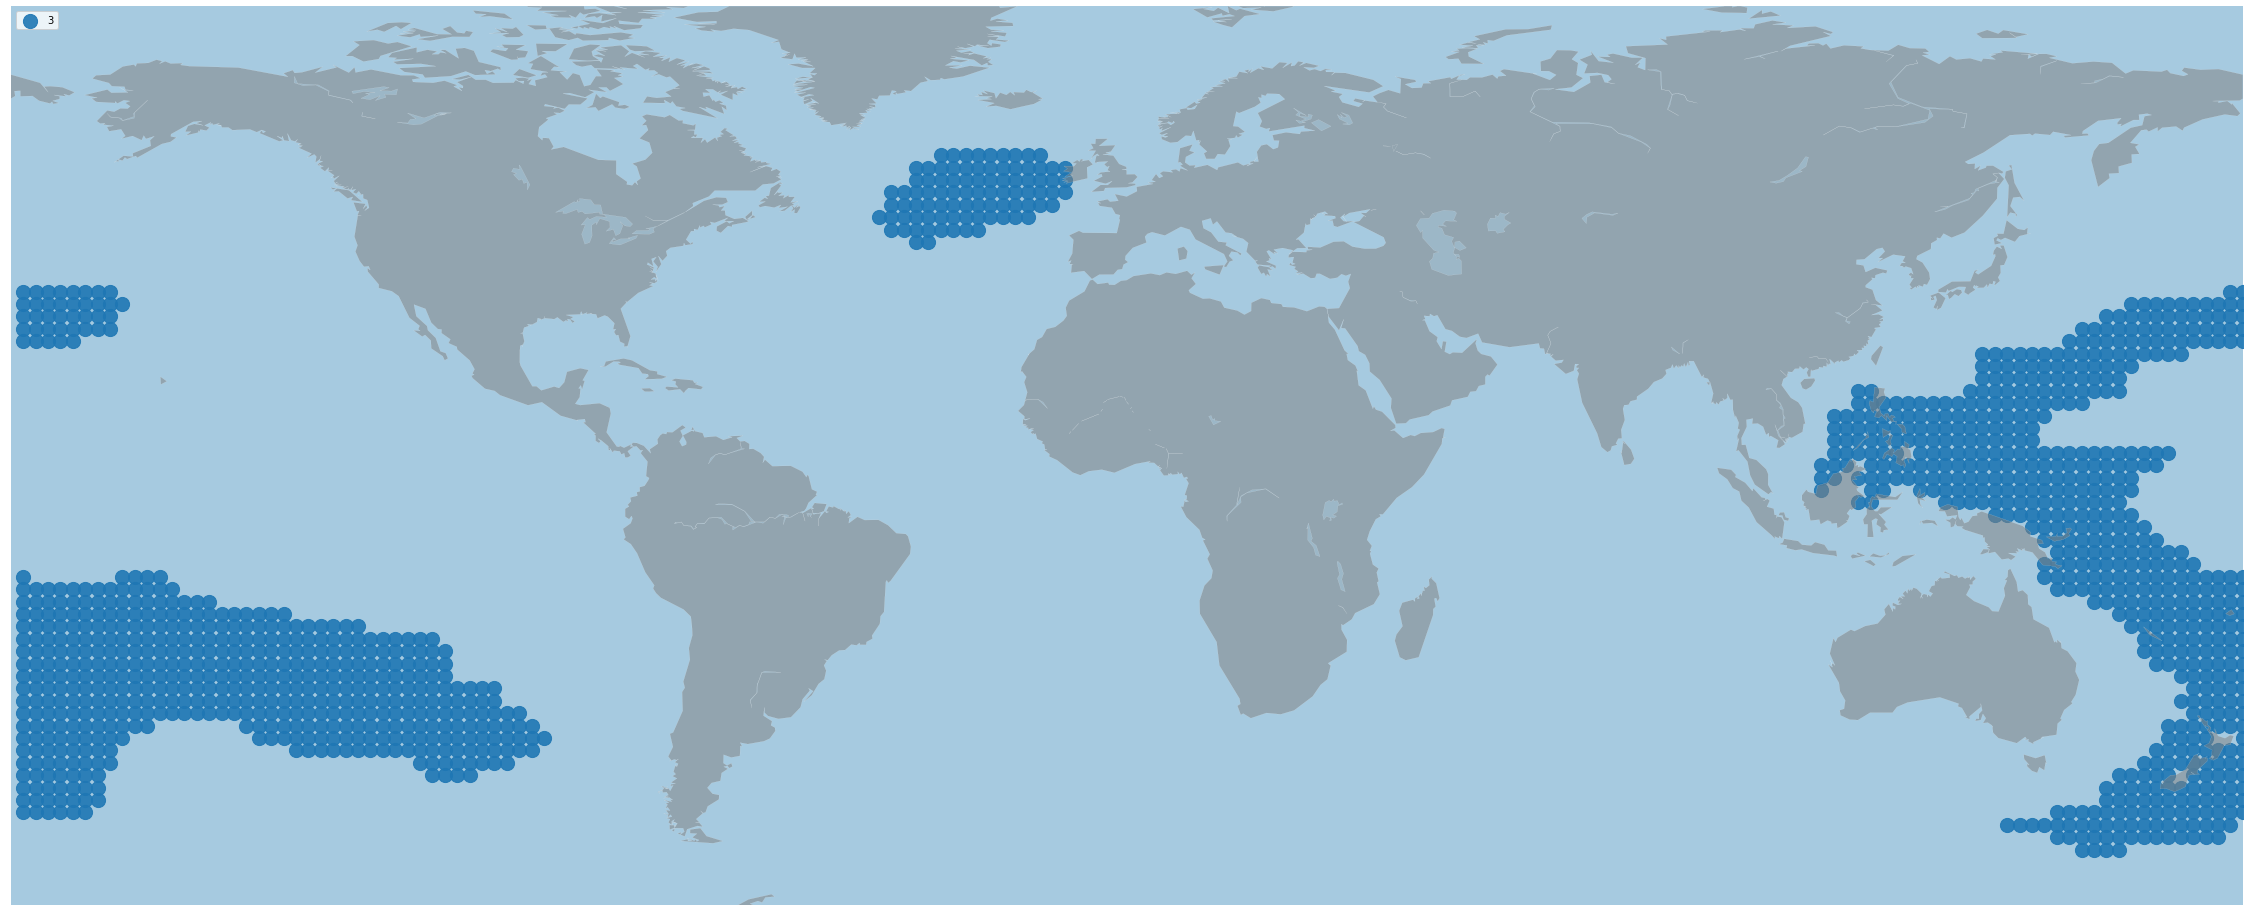

In [124]:
i = 3

df1 = df_sst[df_sst.clusters == i]

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(40,20))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")


lons = df1["lons"].values
lats = df1["lats"].values
x,y = m(lons, lats)
ax.scatter(x, y, alpha=0.9, s=200, label = i)

    
plt.legend()
plt.show()

In [41]:
min_max_scaler = preprocessing.MinMaxScaler()

In [42]:
x_scaled = min_max_scaler.fit_transform(Matrix)

In [43]:
df = pd.DataFrame(x_scaled)

In [44]:
df



,0,1,2,3,4,5,6,7,8,9
0,0.232174,0.507128,0.550462,0.598953,0.578592,0.519908,0.459239,0.458823,0.618160,0.589839
1,0.232174,0.507128,0.550462,0.598953,0.578592,0.519908,0.459239,0.458823,0.618160,0.589839
2,0.232174,0.507128,0.550462,0.598953,0.578592,0.519908,0.459239,0.458823,0.618160,0.589839
3,0.289321,0.562578,0.727303,0.222722,0.506587,0.513671,0.428408,0.490432,0.660328,0.507356
4,0.509109,0.558830,0.456644,0.615680,0.668573,0.583006,0.426213,0.531507,0.417861,0.569213
...,...,...,...,...,...,...,...,...,...,...
10983,0.331041,0.339664,0.149486,0.654869,0.583929,0.602713,0.407380,0.385180,0.548207,0.882346
10984,0.282679,0.347714,0.161898,0.691335,0.618418,0.571464,0.399623,0.378154,0.564496,0.853588
10985,0.232473,0.416850,0.193613,0.469087,0.596166,0.570314,0.432059,0.330204,0.675567,0.789316
10986,0.232293,0.466824,0.196958,0.496146,0.539074,0.548111,0.496509,0.318510,0.703613,0.683162


In [ ]:
stretched Gaussian